# Project Two: Correlation between Sentiment Analysis and Stock Movement

In [1]:
# Import necessary libraries
import numpy as np
from dotenv import load_dotenv
import os
import pandas as pd

# Added for gathering news data
from newsapi import NewsApiClient

# Added for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime

# Added for regular expressions/text preprocessing
import re  

# Added to get stock price data
import yfinance as yf

# Added for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Import encoder from sklearn
from sklearn.preprocessing import StandardScaler

# Sentiment Analysis

In [2]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load environment variables and read the News API key from the environment variable
load_dotenv(r"C:\Users\5th gen\Dropbox\PC\Desktop\FinTech & Machine Learning Bootcamp\example.env")
api_key = os.getenv("NEWS_API_KEY2")

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

# List of companies to fetch news for
companies = [
    "Google",
    "Amazon",
    "Microsoft",
    "Apple",
    "Tesla",
    "META",
    "Walmart",
    "Verizon",
    "Samsung"
]

# Define the start and end date in the format "YYYY-MM-DD"
start_date = "2023-11-14"
end_date = "2023-12-11"

# Convert the date strings to datetime objects
start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d")

# Create a dictionary to store sentiment data for each company
company_sentiments = {}

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

# Fetch news articles for each company and preprocess them
for company in companies:
    # Fetch news articles for the current company
    news_articles = newsapi.get_everything(
        q=company,
        language="en",
        from_param=start_datetime.strftime("%Y-%m-%dT%H:%M:%SZ"),
        to=end_datetime.strftime("%Y-%m-%dT%H:%M:%SZ"),
        page_size=100,
        sort_by="relevancy"
    )

    # Print total articles for the current company
    print(f"Total articles about {company}: {news_articles['totalResults']}")

    # Initialize a list to store sentiment data for the current company
    company_sentiment_data = []

    # Create DataFrame for the current company's sentiment data 
    for article in news_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]

            # Preprocessing steps
            text = preprocess_text(text)

            sentiment = sia.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            neg = sentiment["neg"]

            company_sentiment_data.append({

                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu})# removed all the unnecessary columns, such as positive, negative, text, neutral


        except AttributeError:
            pass

    # Create DataFrame for the current company's sentiment data
    company_df = pd.DataFrame(company_sentiment_data)

    # Reorder DataFrame columns
    cols = ["date", "compound", "positive", "negative", "neutral"]
    company_df = company_df[cols]

    # Store the sentiment data DataFrame in the dictionary
    company_sentiments[company] = company_df

[nltk_data] Downloading package vader_lexicon to C:\Users\5th
[nltk_data]     gen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Python-dotenv could not parse statement starting at line 3


Total articles about Google: 30584
Total articles about Amazon: 34934
Total articles about Microsoft: 12585
Total articles about Apple: 23854
Total articles about Tesla: 6607
Total articles about META: 8777
Total articles about Walmart: 6275
Total articles about Verizon: 1088
Total articles about Samsung: 6433


In [3]:
# Sort the index of the dataframe
company_df.sort_index(inplace=True)

In [4]:
# Create a dataframe for each brand
google_sent_df = company_sentiments["Google"]
amazon_sent_df = company_sentiments["Amazon"]
meta_sent_df = company_sentiments["META"]
tesla_sent_df=company_sentiments["Tesla"]
walmart_sent_df = company_sentiments["Walmart"]
samsung_sent_df = company_sentiments["Samsung"]
apple_sent_df = company_sentiments["Apple"]
microsoft_sent_df = company_sentiments["Microsoft"]
verizon_sent_df = company_sentiments["Verizon"]

In [5]:
# Set "date" as the index for each dataframe
google_sent_df.set_index("date", inplace=True)
amazon_sent_df.set_index("date", inplace=True)
meta_sent_df.set_index("date", inplace=True)
tesla_sent_df.set_index("date", inplace=True)
walmart_sent_df.set_index("date", inplace=True)
samsung_sent_df.set_index("date", inplace=True)
apple_sent_df.set_index("date", inplace=True)
microsoft_sent_df.set_index("date", inplace=True)
verizon_sent_df.set_index("date", inplace=True)

In [8]:
google_sorted_sent =google_sent_df.sort_index()
amazon_sorted_sent = amazon_sent_df
meta_sorted_sent= meta_sent_df.sort_index()
tesla_sorted_sent= tesla_sent_df.sort_index()
walmart_sorted_sent=walmart_sent_df.sort_index()
samsung_sorted_sent=samsung_sent_df.sort_index()
apple_sorted_sent= apple_sent_df.sort_index()
microsoft_sorted_sent=microsoft_sent_df.sort_index()
verizon_sorted_sent=verizon_sent_df.sort_index()

____

___________________

# Stock Price Analysis

In [140]:
# Dictionary to map symbols to company names
symbols = {
    "GOOGL": "Google",
    "AMZN": "Amazon",
    "MSFT": "Microsoft",
    "AAPL": "Apple",
    "TSLA": "Tesla",
    "META": "META",
    "WMT": "Walmart",
    "VZ": "Verizon",
    "005930.KS": "Samsung"
}


# Define the date range
start_date = "2023-11-14"
end_date = "2023-12-11"

# Create an empty DataFrame to store the closing prices
closing_prices_df = pd.DataFrame()

# Fetch closing price data for each stock
for symbol in symbols:
    # Download historical data
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    
    # Extract the closing prices
    closing_prices = stock_data["Adj Close"]
    
    # Rename the column with the corresponding company name
    closing_prices = closing_prices.rename(symbols[symbol])
    
    # Concatenate the closing prices into the DataFrame
    if closing_prices_df.empty:
        closing_prices_df = closing_prices
    else:
        closing_prices_df = pd.concat([closing_prices_df, closing_prices], axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [141]:
closing_prices_df = closing_prices_df.dropna()

In [142]:
# Calculate percent changes for each stock
percent_changes_df = closing_prices_df.pct_change()

# Drop rows with NaN values
percent_changes_df.dropna(inplace=True)

In [143]:
# Create separate dataframes for each stock
amazon_closing = closing_prices_df["Amazon"]
google_closing = closing_prices_df["Google"]
microsoft_closing = closing_prices_df["Microsoft"]
apple_closing = closing_prices_df["Apple"]
tesla_closing = closing_prices_df["Tesla"]
meta_closing = closing_prices_df["META"]
walmart_closing = closing_prices_df["Walmart"]
verizon_closing = closing_prices_df["Verizon"]
samsung_closing = closing_prices_df["Samsung"]
verizon_closing = closing_prices_df["Verizon"]

In [144]:
# Create separate dataframes for each stock's price changes per day
amazon_stock = percent_changes_df["Amazon"]
google_stock = percent_changes_df["Google"]
microsoft_stock = percent_changes_df["Microsoft"]
apple_stock = percent_changes_df["Apple"]
tesla_stock = percent_changes_df["Tesla"]
meta_stock = percent_changes_df["META"]
walmart_stock = percent_changes_df["Walmart"]
verizon_stock = percent_changes_df["Verizon"]
samsung_stock = percent_changes_df["Samsung"]
verizon_stock = percent_changes_df["Verizon"]

In [145]:
# List of companies to analyze
companies_to_analyze = ["Google", "Amazon", "Microsoft", "Apple", "Tesla", "META", "Walmart", "Samsung", "Verizon"]

# Create a dictionary to store average compound DataFrames
average_compound_data = {}

for company in companies_to_analyze:
    # Group the DataFrame by the date and calculate the mean of the compound values
    company_compound_avg_df = company_sentiments[company].groupby("date")["compound"].mean().reset_index()

    # Set the date column as the index
    company_compound_avg_df.set_index("date", inplace=True)

    # Store the average compound DataFrame in the dictionary
    average_compound_data[company] = company_compound_avg_df


### Sentiment of the company

This data should be used to assess how each company has been faring in the media. This data shows if the news is good, bad or neutral.

In [146]:
# Calculate the average compound data for each company
amazon_compound_avg_df = average_compound_data["Amazon"]
google_compound_avg_df=average_compound_data["Google"]
tesla_compound_avg_df=average_compound_data["Tesla"]
microsoft_compound_avg_df=average_compound_data["Microsoft"]
apple_compound_avg_df=average_compound_data["Apple"]
meta_compound_avg_df=average_compound_data["META"]
walmart_compound_avg_df=average_compound_data["Walmart"]
samsung_compound_avg_df=average_compound_data["Samsung"]
verizon_compound_avg_df=average_compound_data["Verizon"]

In [147]:
# Calculate the average compound score for each company
amazon_compound_avg = amazon_compound_avg_df.mean()
google_compound_avg = google_compound_avg_df.mean()
tesla_compound_avg = tesla_compound_avg_df.mean()
microsoft_compound_avg = microsoft_compound_avg_df.mean()
apple_compound_avg = apple_compound_avg_df.mean()
meta_compound_avg = meta_compound_avg_df.mean()
walmart_compound_avg = walmart_compound_avg_df.mean()
samsung_compound_avg = samsung_compound_avg_df.mean()
verizon_compound_avg = verizon_compound_avg_df.mean()

# Print the average compound score for each company
print(f"Amazon Average Compound Score: {amazon_compound_avg}")
print(f"Google Average Compound Score: {google_compound_avg}")
print(f"Tesla Average Compound Score: {tesla_compound_avg}")
print(f"Microsoft Average Compound Score: {microsoft_compound_avg}")
print(f"Apple Average Compound Score: {apple_compound_avg}")
print(f"META Average Compound Score: {meta_compound_avg}")
print(f"Walmart Average Compound Score: {walmart_compound_avg}")
print(f"Samsung Average Compound Score: {samsung_compound_avg}")
print(f"Verizon Average Compound Score: {verizon_compound_avg}")

Amazon Average Compound Score: compound    0.274797
dtype: float64
Google Average Compound Score: compound    0.21792
dtype: float64
Tesla Average Compound Score: compound   -0.114319
dtype: float64
Microsoft Average Compound Score: compound    0.250405
dtype: float64
Apple Average Compound Score: compound    0.264787
dtype: float64
META Average Compound Score: compound    0.22845
dtype: float64
Walmart Average Compound Score: compound    0.183206
dtype: float64
Samsung Average Compound Score: compound    0.300511
dtype: float64
Verizon Average Compound Score: compound    0.426751
dtype: float64


#### NOTE: 
Use this code to see if there is a positive or negative correlation between the sentiment and stock movement, if:
- its a positive correlation, then the stock price would go up as the sentiment goes up, and if its a negative correlation then the stock price would go down
- its a negative correlation, then stock price would move inversely
- its close to zero than the stock price is not impacted by the sentiment

_______________________________________________________________________________

#### Cumulative sentiment and stock data

In [148]:
# Cumulative data of sentiment analysis (compound) value
microsoft_sent_cumsum= microsoft_compound_avg_df.cumsum()
google_sent_cumsum=google_compound_avg_df.cumsum()
tesla_sent_cumsum = tesla_compound_avg_df.cumsum()
amazon_sent_cumsum = amazon_compound_avg_df.cumsum()
apple_sent_cumsum = apple_compound_avg_df.cumsum()
meta_sent_cumsum = meta_compound_avg_df.cumsum()
walmart_sent_cumsum = walmart_compound_avg_df.cumsum()
samsung_sent_cumsum= samsung_compound_avg_df.cumsum()
verizon_sent_cumsum= verizon_compound_avg_df.cumsum()

In [149]:
# Calculate cumulative stock price data
microsoft_stock_cumsum= microsoft_stock.cumsum()
google_stock_cumsum=google_stock.cumsum()
tesla_stock_cumsum =tesla_stock.cumsum()
apple_stock_cumsum = apple_stock.cumsum()
meta_stock_cumsum = meta_stock.cumsum()
walmart_stock_cumsum = walmart_stock.cumsum()
samsung_stock_cumsum = samsung_stock.cumsum()
verizon_stock_cumsum = verizon_stock.cumsum()
amazon_stock_cumsum = amazon_stock.cumsum()

#### NOTE:
Use this data for the creation of graphs to show correlation. It is only for visualisation and **has no bearing on the calculation of the correlation coefficient and should not be used for that.**

# Individual Company Analysis

### 1. Verizon Analysis

In [150]:
# Convert the date index to datetime objects for both dataframes
verizon_compound_avg_df.index = pd.to_datetime(verizon_compound_avg_df.index)
verizon_closing.index = pd.to_datetime(verizon_closing.index)

# Merge the two dataframes on their date indices
merged_df_verizon = pd.merge(verizon_compound_avg_df, verizon_closing, left_index=True, right_index=True)

# Calculate the correlation coefficient
verizon_k = merged_df_verizon["compound"].corr(merged_df_verizon["Verizon"], method='kendall')
verizon_s = merged_df_verizon["compound"].corr(merged_df_verizon["Verizon"], method='spearman')
verizon_cc = merged_df_verizon["compound"].corr(merged_df_verizon["Verizon"], method='pearson')
# Display the correlation coefficient
print(f"Sentiment and Price Correlation through Kendall is {verizon_k:.4f}")
print(f"Sentiment and Price Correlation through Spearman is {verizon_s:.4f}")
print(f"Sentiment and Price Correlation through Pearson is {verizon_cc:.4f}")

print(f"Verizon Average Compound Score: {verizon_compound_avg.iloc[0]:.4f}")

Sentiment and Price Correlation through Kendall is -0.1402
Sentiment and Price Correlation through Spearman is -0.1974
Sentiment and Price Correlation through Pearson is -0.2262
Verizon Average Compound Score: 0.4268


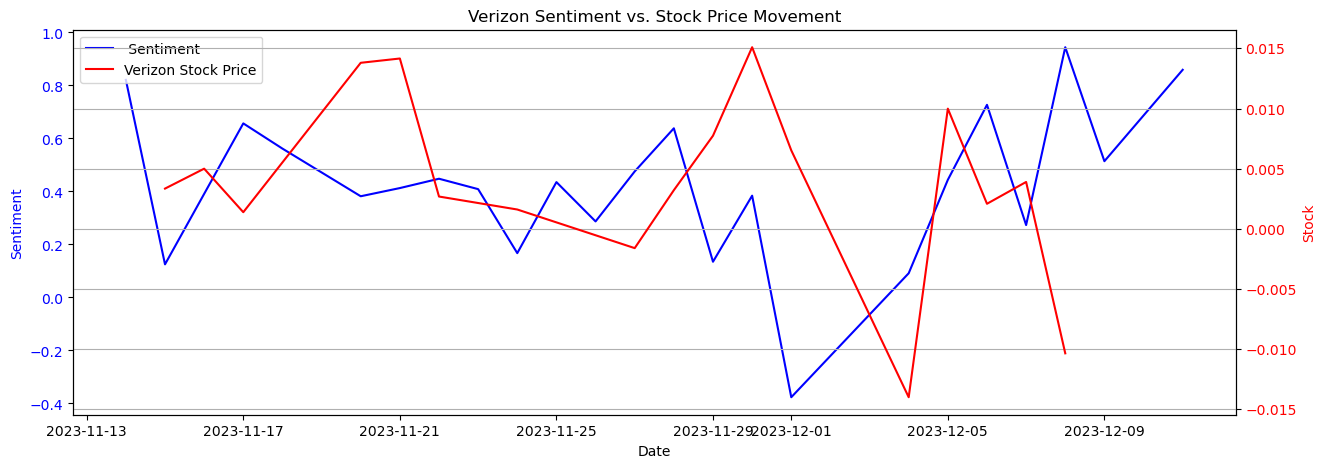

In [151]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax1.plot(verizon_compound_avg_df.index, verizon_compound_avg_df, label=' Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis (right) for the percentage change
ax2 = ax1.twinx()
ax2.plot(verizon_stock.index, verizon_stock, label='Verizon Stock Price', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left")


# Set the title of the chart
plt.title('Verizon Sentiment vs. Stock Price Movement')

# Show the plot
plt.grid(True)
plt.show()


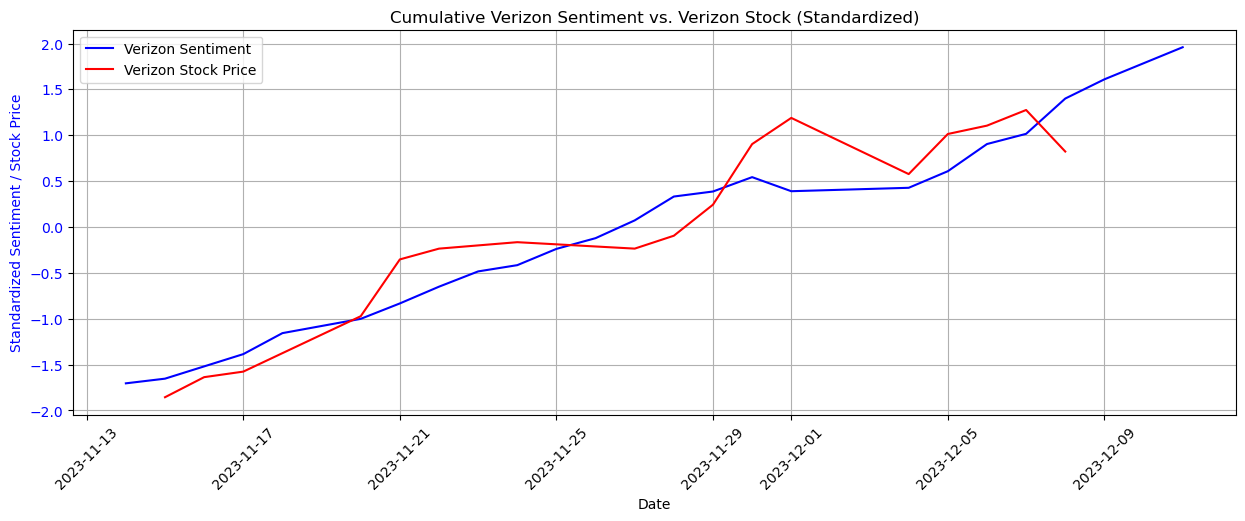

In [152]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Convert the index to a DatetimeIndex
verizon_sent_cumsum.index = pd.to_datetime(verizon_sent_cumsum.index)
verizon_stock_cumsum.index = pd.to_datetime(verizon_stock_cumsum.index)

# Standardize both sentiment and stock price cumulative data
verizon_sent_cumsum_scaled = scaler.fit_transform(verizon_sent_cumsum.values.reshape(-1, 1))
verizon_stock_cumsum_scaled = scaler.fit_transform(verizon_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(verizon_sent_cumsum.index, verizon_sent_cumsum_scaled, label='Verizon Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(verizon_stock_cumsum.index, verizon_stock_cumsum_scaled, label='Verizon Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Verizon Sentiment vs. Verizon Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

______________

### 2. Amazon Analysis

In [153]:
# Convert the date index to datetime objects for both dataframes
amazon_compound_avg_df.index = pd.to_datetime(amazon_compound_avg_df.index)
amazon_stock.index = pd.to_datetime(amazon_stock.index)

# Merge the two dataframes on their date indices
merged_df_amazon= pd.merge(amazon_compound_avg_df, amazon_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
amazon_k = merged_df_amazon["compound"].corr(merged_df_amazon["Amazon"], method='kendall')
amazon_s = merged_df_amazon["compound"].corr(merged_df_amazon["Amazon"], method='spearman')
amazon_cc = merged_df_amazon["compound"].corr(merged_df_amazon["Amazon"], method='pearson')
# Display the correlation coefficient
print(f"Sentiment and Price Correlation through Kendall is {amazon_k:.4f}")
print(f"Sentiment and Price Correlation through Spearman is {amazon_s:.4f}")
print(f"Sentiment and Price Correlation through Pearson is {amazon_cc:.4f}")

print(f"Amazon Average Compound Score: {amazon_compound_avg.iloc[0]:.4f}")

Sentiment and Price Correlation through Kendall is 0.0476
Sentiment and Price Correlation through Spearman is 0.0929
Sentiment and Price Correlation through Pearson is 0.0131
Amazon Average Compound Score: 0.2748


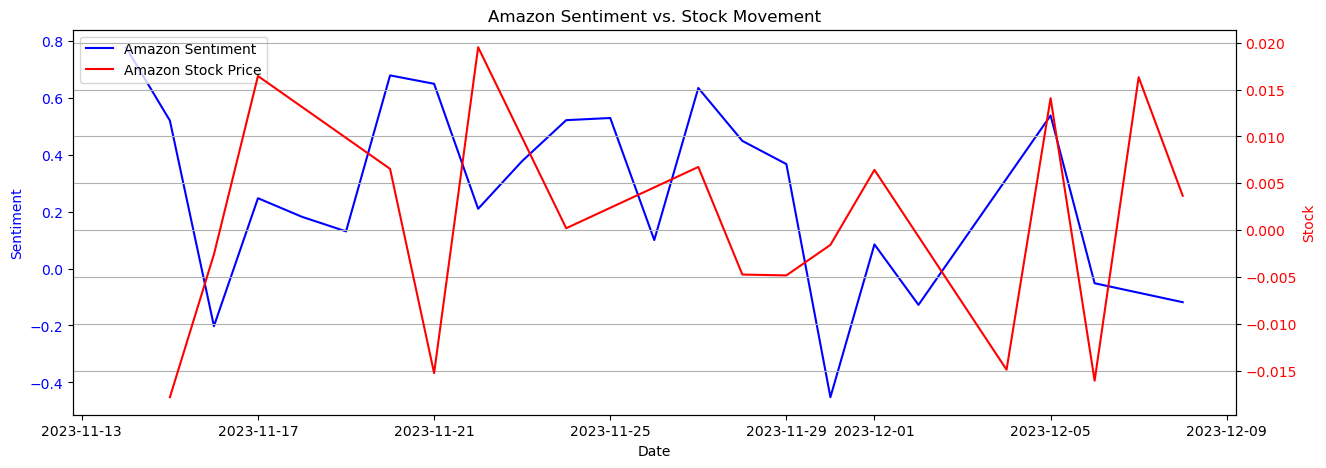

In [154]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax1.plot(amazon_compound_avg_df.index, amazon_compound_avg_df, label='Amazon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis (right) for the percentage change
ax2 = ax1.twinx()
ax2.plot(amazon_stock.index, amazon_stock, label='Amazon Stock Price', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Amazon Sentiment vs. Stock Movement')

# Show the plot
plt.grid(True)
plt.show()


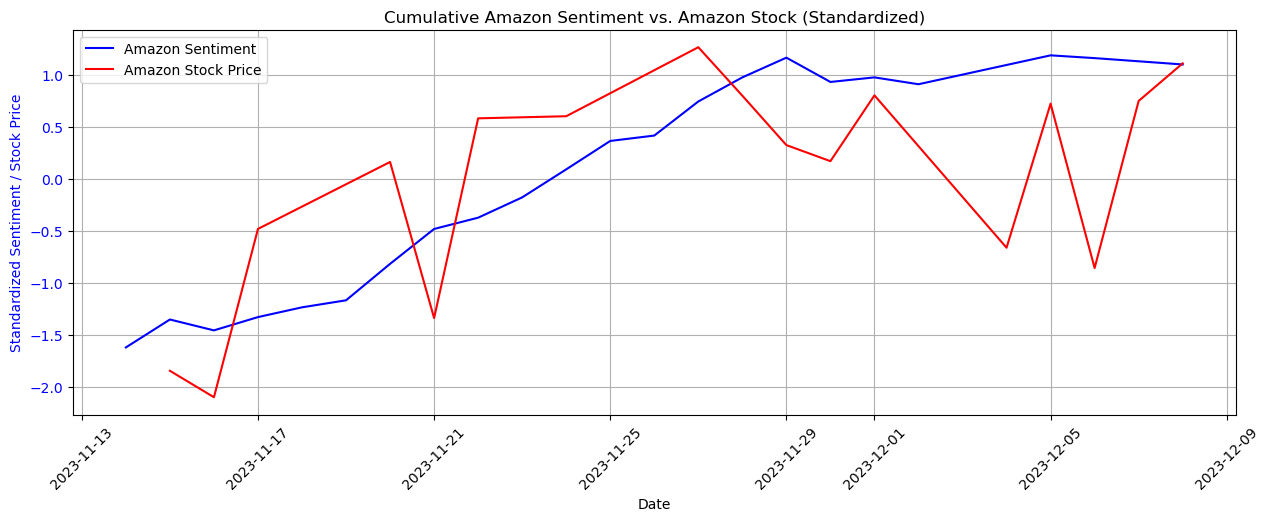

In [155]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Convert the index to a DatetimeIndex
amazon_sent_cumsum.index = pd.to_datetime(amazon_sent_cumsum.index)
amazon_stock_cumsum.index = pd.to_datetime(amazon_stock_cumsum.index)

# Standardize both sentiment and stock price cumulative data for Amazon
amazon_sent_cumsum_scaled = scaler.fit_transform(amazon_sent_cumsum.values.reshape(-1, 1))
amazon_stock_cumsum_scaled = scaler.fit_transform(amazon_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(amazon_sent_cumsum.index, amazon_sent_cumsum_scaled, label='Amazon Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(amazon_stock_cumsum.index, amazon_stock_cumsum_scaled, label='Amazon Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Amazon Sentiment vs. Amazon Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

______

### 3. Google Analysis

In [156]:
# Convert the date index to datetime objects for both dataframes
google_compound_avg_df.index = pd.to_datetime(google_compound_avg_df.index)
google_closing.index = pd.to_datetime(google_closing.index)

# Merge the two dataframes on their date indices
merged_df_google= pd.merge(google_compound_avg_df, google_closing, left_index=True, right_index=True)

# Calculate the correlation coefficient
google_k = merged_df_google["compound"].corr(merged_df_google["Google"], method='kendall')
google_s = merged_df_google["compound"].corr(merged_df_google["Google"], method='spearman')
google_cc = merged_df_google["compound"].corr(merged_df_google["Google"], method='pearson')
# Display the correlation coefficient
print(f"Sentiment and Price Correlation through Kendall is {google_k:.4f}")
print(f"Sentiment and Price Correlation through Spearman is {google_s:.4f}")
print(f"Sentiment and Price Correlation through Pearson is {google_cc:.4f}")

print(f"Google Average Compound Score: {google_compound_avg.iloc[0]:.4f}")


Sentiment and Price Correlation through Kendall is 0.1333
Sentiment and Price Correlation through Spearman is 0.1485
Sentiment and Price Correlation through Pearson is 0.1650
Google Average Compound Score: 0.2179


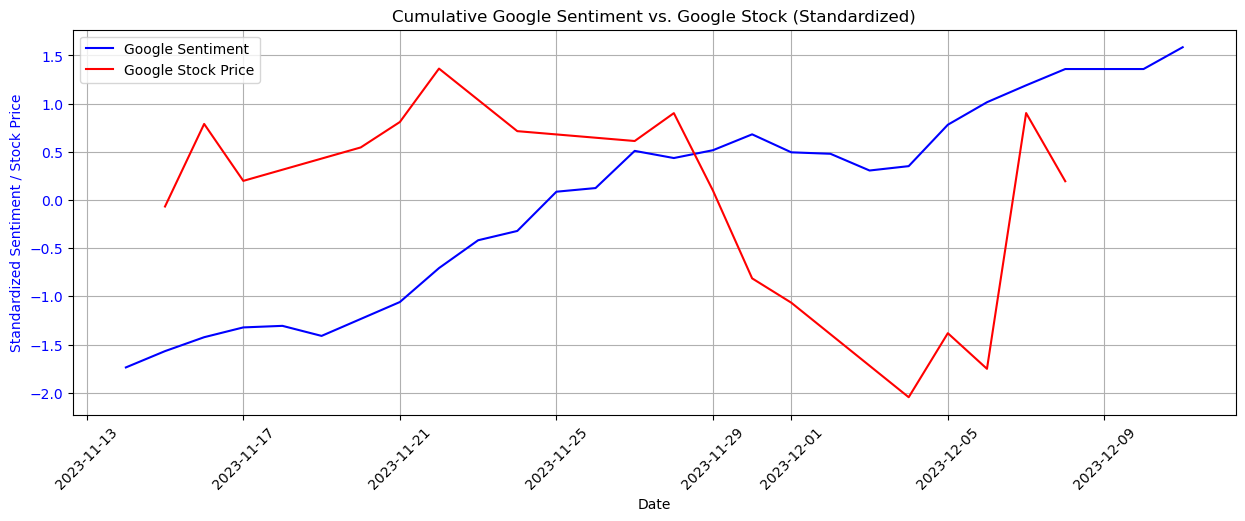

In [157]:
# Convert the index to a DatetimeIndex
google_sent_cumsum.index = pd.to_datetime(google_sent_cumsum.index)
google_stock_cumsum.index = pd.to_datetime(google_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Google
google_sent_cumsum_scaled = scaler.fit_transform(google_sent_cumsum.values.reshape(-1, 1))
google_stock_cumsum_scaled = scaler.fit_transform(google_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(google_sent_cumsum.index, google_sent_cumsum_scaled, label='Google Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(google_stock_cumsum.index, google_stock_cumsum_scaled, label='Google Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Google Sentiment vs. Google Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

______

### 4. Tesla Analysis

In [158]:
# Convert the date index to datetime objects for both dataframes
tesla_compound_avg_df.index = pd.to_datetime(tesla_compound_avg_df.index)
tesla_closing.index = pd.to_datetime(tesla_closing.index)

# Merge the two dataframes on their date indices
merged_df_tesla= pd.merge(tesla_compound_avg_df, tesla_closing, left_index=True, right_index=True)

# Calculate the correlation coefficient
tesla_k = merged_df_tesla["compound"].corr(merged_df_tesla["Tesla"], method='kendall')
tesla_s = merged_df_tesla["compound"].corr(merged_df_tesla["Tesla"], method='spearman')
tesla_cc = merged_df_tesla["compound"].corr(merged_df_tesla["Tesla"], method='pearson')
# Display the correlation coefficient
print(f"Sentiment and Price Correlation through Kendall is {tesla_k:.4f}")
print(f"Sentiment and Price Correlation through Spearman is {tesla_s:.4f}")
print(f"Sentiment and Price Correlation through Pearson is {tesla_cc:.4f}")
print(f"Tesla Average Compound Score: {tesla_compound_avg.iloc[0]:.4f}")

Sentiment and Price Correlation through Kendall is 0.0719
Sentiment and Price Correlation through Spearman is 0.1187
Sentiment and Price Correlation through Pearson is 0.2457
Tesla Average Compound Score: -0.1143


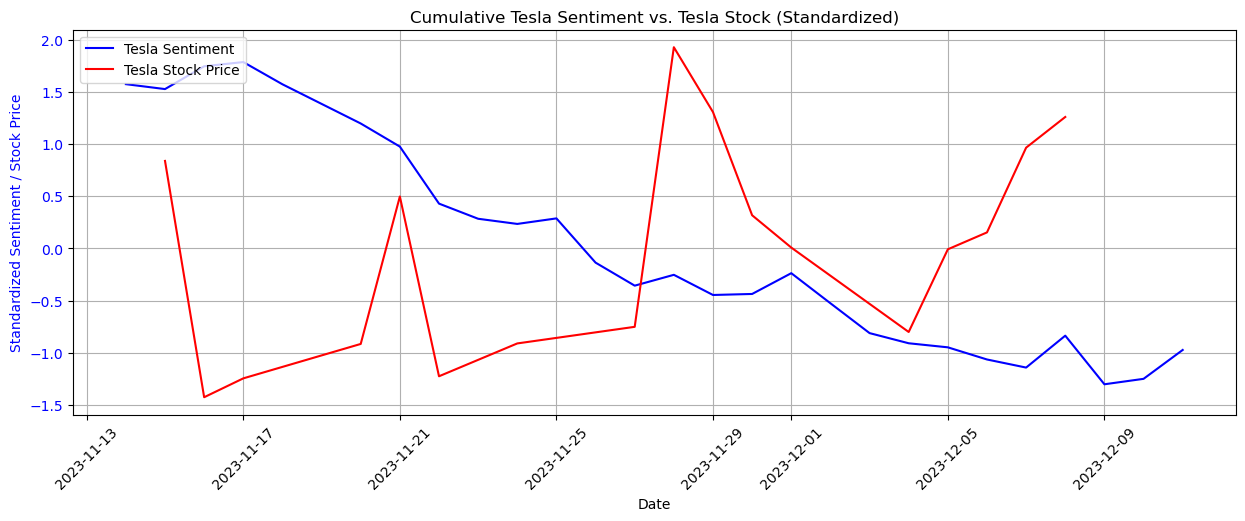

In [159]:
# Convert the index to a DatetimeIndex
tesla_sent_cumsum.index = pd.to_datetime(tesla_sent_cumsum.index)
tesla_stock_cumsum.index = pd.to_datetime(tesla_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Tesla
tesla_sent_cumsum_scaled = scaler.fit_transform(tesla_sent_cumsum.values.reshape(-1, 1))
tesla_stock_cumsum_scaled = scaler.fit_transform(tesla_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(tesla_sent_cumsum.index, tesla_sent_cumsum_scaled, label='Tesla Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(tesla_stock_cumsum.index, tesla_stock_cumsum_scaled, label='Tesla Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Tesla Sentiment vs. Tesla Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


________

### 5. Microsoft Analysis

In [160]:
# Convert the date index to datetime objects for both dataframes
microsoft_compound_avg_df.index = pd.to_datetime(microsoft_compound_avg_df.index)
microsoft_closing.index = pd.to_datetime(microsoft_closing.index)

# Merge the two dataframes on their date indices
merged_df_microsoft= pd.merge(microsoft_compound_avg_df, microsoft_closing, left_index=True, right_index=True)

# Calculate the correlation coefficient
microsoft_k = merged_df_microsoft["compound"].corr(merged_df_microsoft["Microsoft"], method='kendall')
microsoft_s = merged_df_microsoft["compound"].corr(merged_df_microsoft["Microsoft"], method='spearman')
microsoft_cc = merged_df_microsoft["compound"].corr(merged_df_microsoft["Microsoft"], method='pearson')
# Display the correlation coefficient
print(f"Sentiment and Price Correlation through Kendall is {microsoft_k:.4f}")
print(f"Sentiment and Price Correlation through Spearman is {microsoft_s:.4f}")
print(f"Sentiment and Price Correlation through Pearson is {microsoft_cc:.4f}")

print(f"Microsoft Average Compound Score: {microsoft_compound_avg.iloc[0]:.4f}")


Sentiment and Price Correlation through Kendall is -0.3088
Sentiment and Price Correlation through Spearman is -0.3946
Sentiment and Price Correlation through Pearson is -0.3159
Microsoft Average Compound Score: 0.2504


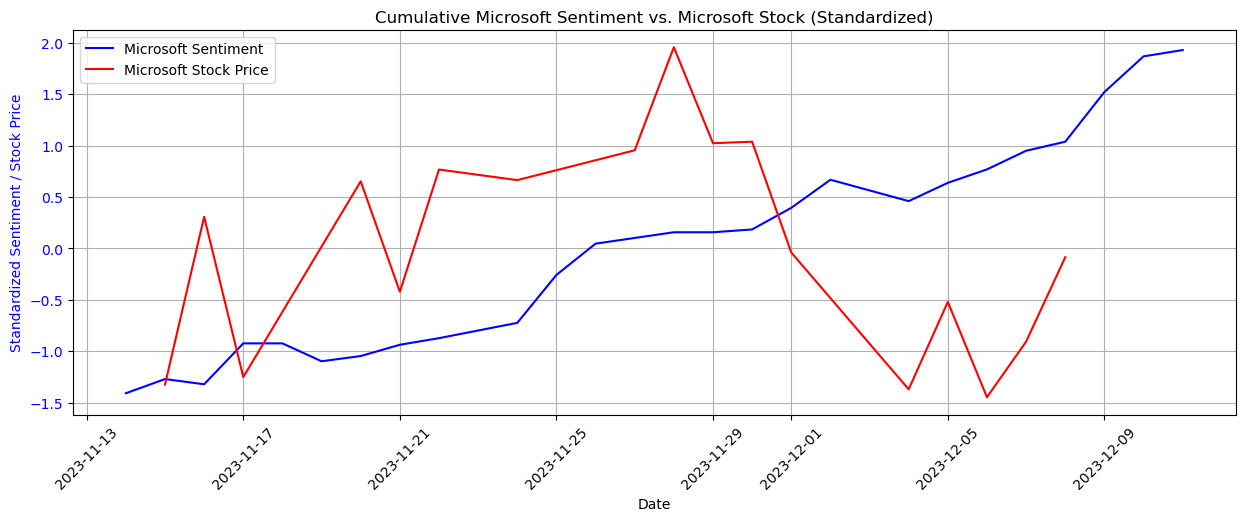

In [161]:
# Convert the index to a DatetimeIndex
microsoft_sent_cumsum.index = pd.to_datetime(microsoft_sent_cumsum.index)
microsoft_stock_cumsum.index = pd.to_datetime(microsoft_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data
microsoft_sent_cumsum_scaled = scaler.fit_transform(microsoft_sent_cumsum.values.reshape(-1, 1))
microsoft_stock_cumsum_scaled = scaler.fit_transform(microsoft_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(microsoft_sent_cumsum.index, microsoft_sent_cumsum_scaled, label='Microsoft Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(microsoft_stock_cumsum.index, microsoft_stock_cumsum_scaled, label='Microsoft Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Microsoft Sentiment vs. Microsoft Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

____________

### 6. Walmart Analysis

In [162]:
# Convert the date index to datetime objects for both dataframes
walmart_compound_avg_df.index = pd.to_datetime(walmart_compound_avg_df.index)
walmart_closing.index = pd.to_datetime(walmart_closing.index)

# Merge the two dataframes on their date indices
merged_df_walmart= pd.merge(walmart_compound_avg_df, walmart_closing, left_index=True, right_index=True)

# Calculate the correlation coefficient
walmart_k = merged_df_walmart["compound"].corr(merged_df_walmart["Walmart"], method='kendall')
walmart_s = merged_df_walmart["compound"].corr(merged_df_walmart["Walmart"], method='spearman')
walmart_cc = merged_df_walmart["compound"].corr(merged_df_walmart["Walmart"], method='pearson')
# Display the correlation coefficient
print(f"Walmart's Sentiment and Price Correlation through Kendall is {walmart_k:.4f}")
print(f"Walmart's Sentiment and Price Correlation through Spearman is {walmart_s:.4f}")
print(f"Walmart's Sentiment and Price Correlation through Pearson is {walmart_cc:.4f}")

print(f"Walmart Average Compound Score: {walmart_compound_avg.iloc[0]: .4f}")


Walmart's Sentiment and Price Correlation through Kendall is 0.2929
Walmart's Sentiment and Price Correlation through Spearman is 0.4327
Walmart's Sentiment and Price Correlation through Pearson is 0.0739
Walmart Average Compound Score:  0.1832


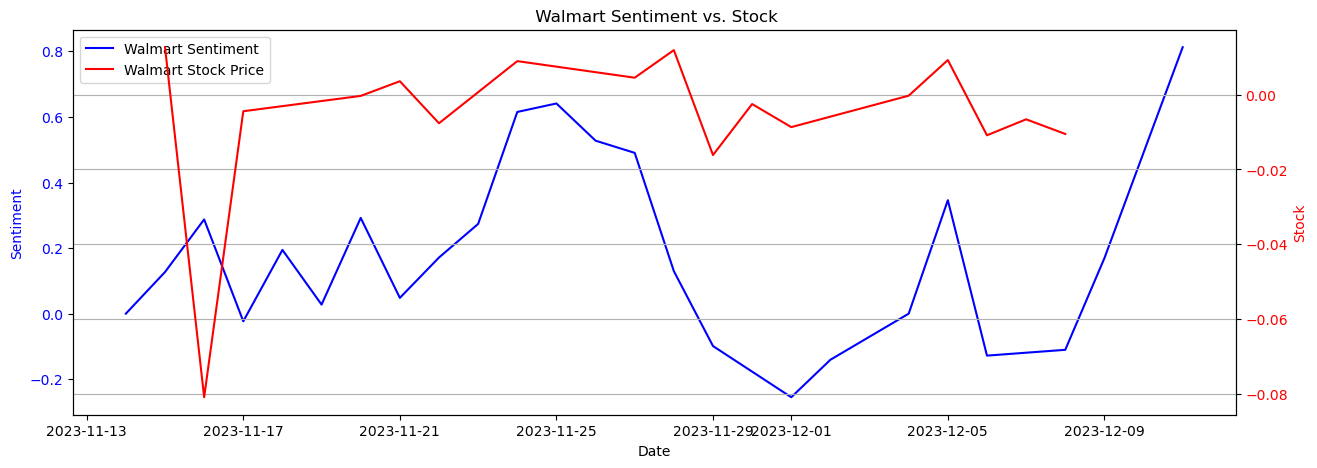

In [163]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax1.plot(walmart_compound_avg_df.index, walmart_compound_avg_df, label='Walmart Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis (right) for the percentage change
ax2 = ax1.twinx()
ax2.plot(walmart_stock.index, walmart_stock, label='Walmart Stock Price', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title(' Walmart Sentiment vs. Stock')

# Show the plot
plt.grid(True)
plt.show()


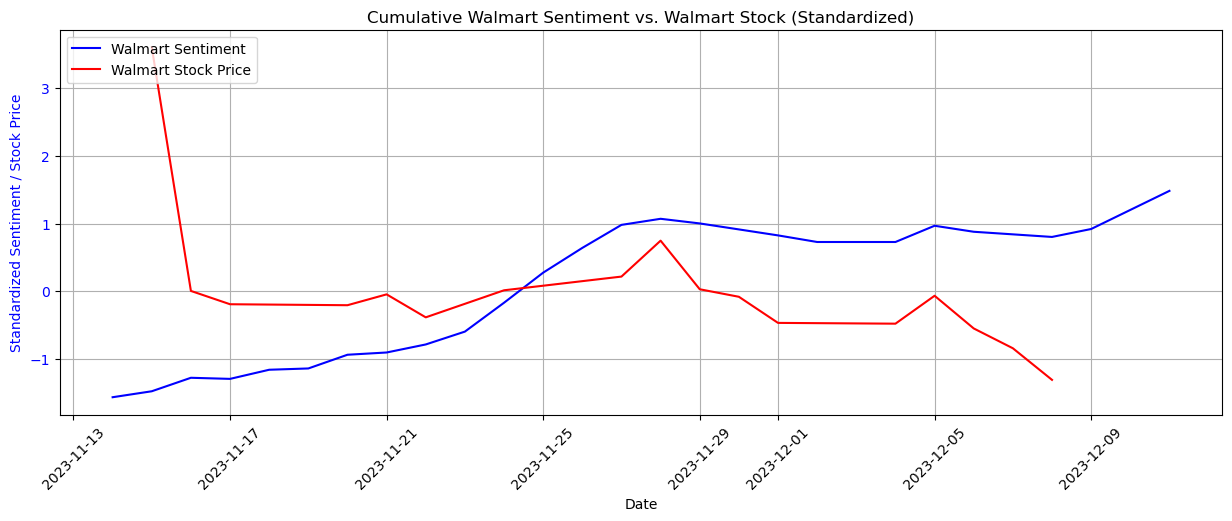

In [164]:
# Convert the index to a DatetimeIndex
walmart_sent_cumsum.index = pd.to_datetime(walmart_sent_cumsum.index)
walmart_stock_cumsum.index = pd.to_datetime(walmart_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Walmart
walmart_sent_cumsum_scaled = scaler.fit_transform(walmart_sent_cumsum.values.reshape(-1, 1))
walmart_stock_cumsum_scaled = scaler.fit_transform(walmart_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(walmart_sent_cumsum.index, walmart_sent_cumsum_scaled, label='Walmart Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(walmart_stock_cumsum.index, walmart_stock_cumsum_scaled, label='Walmart Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Walmart Sentiment vs. Walmart Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


_____

### 7. Samsung Analysis

In [165]:
# Convert the date index to datetime objects for both dataframes
samsung_compound_avg_df.index = pd.to_datetime(samsung_compound_avg_df.index)
samsung_stock.index = pd.to_datetime(samsung_stock.index)

# Merge the two dataframes on their date indices
merged_df_samsung= pd.merge(samsung_compound_avg_df, samsung_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
samsung_k = merged_df_samsung["compound"].corr(merged_df_samsung["Samsung"], method='kendall')
samsung_s = merged_df_samsung["compound"].corr(merged_df_samsung["Samsung"], method='spearman')
samsung_cc = merged_df_samsung["compound"].corr(merged_df_samsung["Samsung"], method='pearson')
# Display the correlation coefficient
print(f"Samsung's Sentiment and Price Correlation through Kendall is {samsung_k:.4f}")
print(f"Samsung's Sentiment and Price Correlation through Spearman is {samsung_s:.4f}")
print(f"Samsung's Sentiment and Price Correlation through Pearson is {samsung_cc:.4f}")


print(f"Samsung Average Compound Score: {samsung_compound_avg.iloc[0]:.4f}")

Samsung's Sentiment and Price Correlation through Kendall is 0.1333
Samsung's Sentiment and Price Correlation through Spearman is 0.2061
Samsung's Sentiment and Price Correlation through Pearson is 0.3669
Samsung Average Compound Score: 0.3005


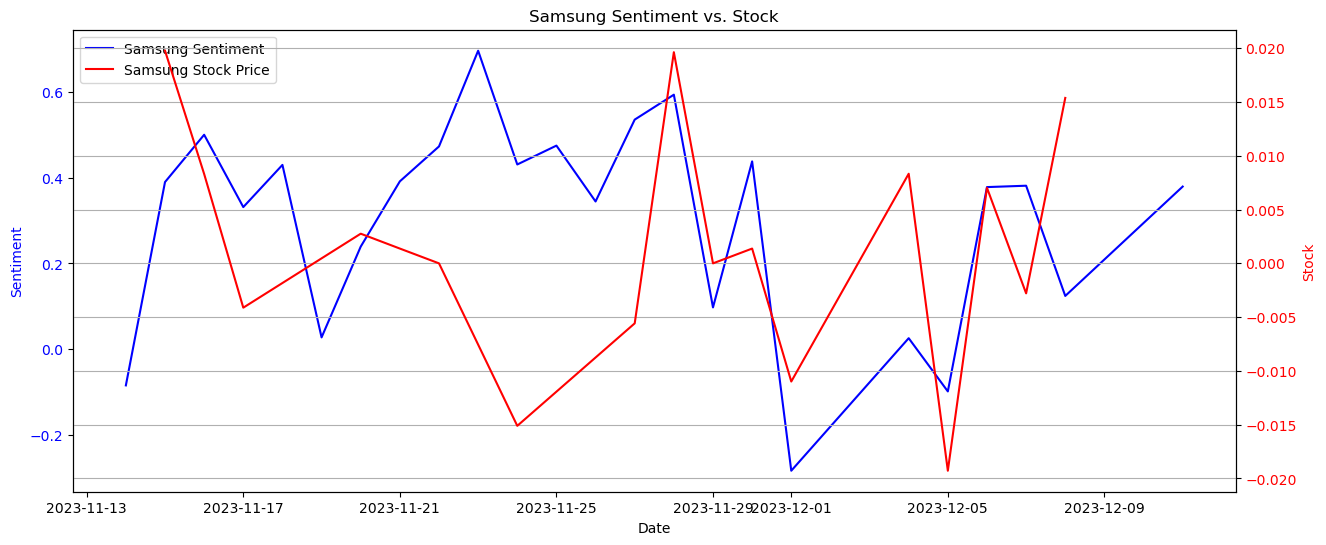

In [166]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax1.plot(samsung_compound_avg_df.index, samsung_compound_avg_df, label='Samsung Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis (right) for the percentage change
ax2 = ax1.twinx()
ax2.plot(samsung_stock.index, samsung_stock, label='Samsung Stock Price', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Samsung Sentiment vs. Stock')

# Show the plot
plt.grid(True)
plt.show()


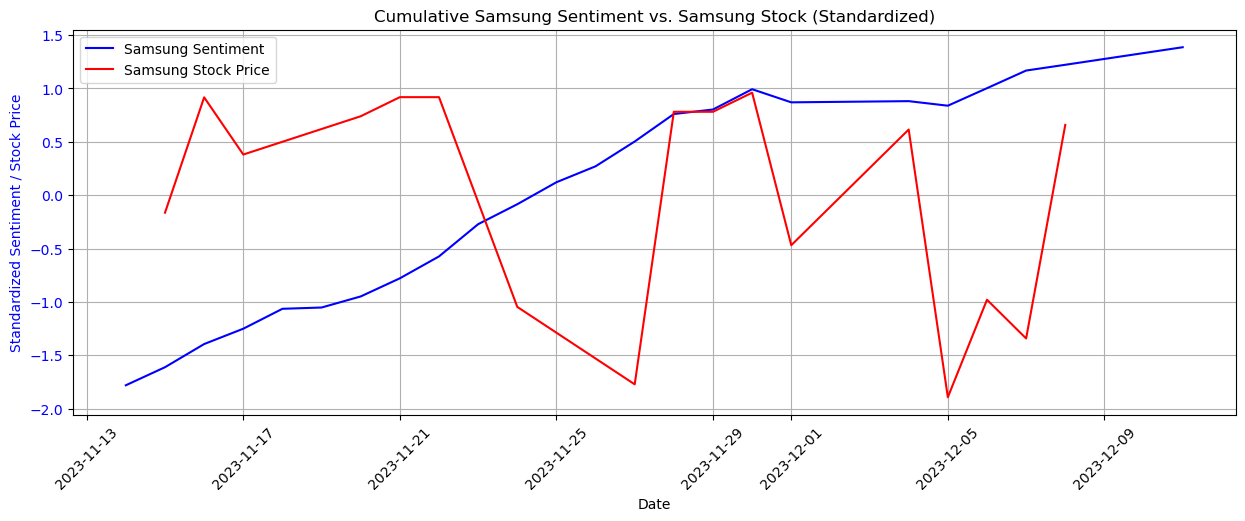

In [167]:
# Convert the index to a DatetimeIndex
samsung_sent_cumsum.index = pd.to_datetime(samsung_sent_cumsum.index)
samsung_stock_cumsum.index = pd.to_datetime(samsung_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Samsung
samsung_sent_cumsum_scaled = scaler.fit_transform(samsung_sent_cumsum.values.reshape(-1, 1))
samsung_stock_cumsum_scaled = scaler.fit_transform(samsung_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(samsung_sent_cumsum.index, samsung_sent_cumsum_scaled, label='Samsung Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(samsung_stock_cumsum.index, samsung_stock_cumsum_scaled, label='Samsung Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Samsung Sentiment vs. Samsung Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


________

### 8. META Analysis

In [168]:
# Convert the date index to datetime objects for both dataframes
meta_compound_avg_df.index = pd.to_datetime(meta_compound_avg_df.index)
meta_stock.index = pd.to_datetime(meta_stock.index)

# Merge the two dataframes on their date indices
merged_df_meta= pd.merge(meta_compound_avg_df, meta_stock, left_index=True, right_index=True)

# Calculate the correlation coefficient
meta_k = merged_df_meta["compound"].corr(merged_df_meta["META"], method='kendall')
meta_s = merged_df_meta["compound"].corr(merged_df_meta["META"], method='spearman')
meta_cc = merged_df_meta["compound"].corr(merged_df_meta["META"], method='pearson')
# Display the correlation coefficient
print(f"META's Sentiment and Price Correlation through Kendall is {meta_k:.2f}")
print(f"META's Sentiment and Price Correlation through Spearman is {meta_s:.2f}")
print(f"META's Sentiment and Price Correlation through Pearson is {meta_cc:.2f}")

print(f"META Average Compound Score: {meta_compound_avg.iloc[0]:.2f}")

META's Sentiment and Price Correlation through Kendall is -0.03
META's Sentiment and Price Correlation through Spearman is -0.03
META's Sentiment and Price Correlation through Pearson is -0.20
META Average Compound Score: 0.23


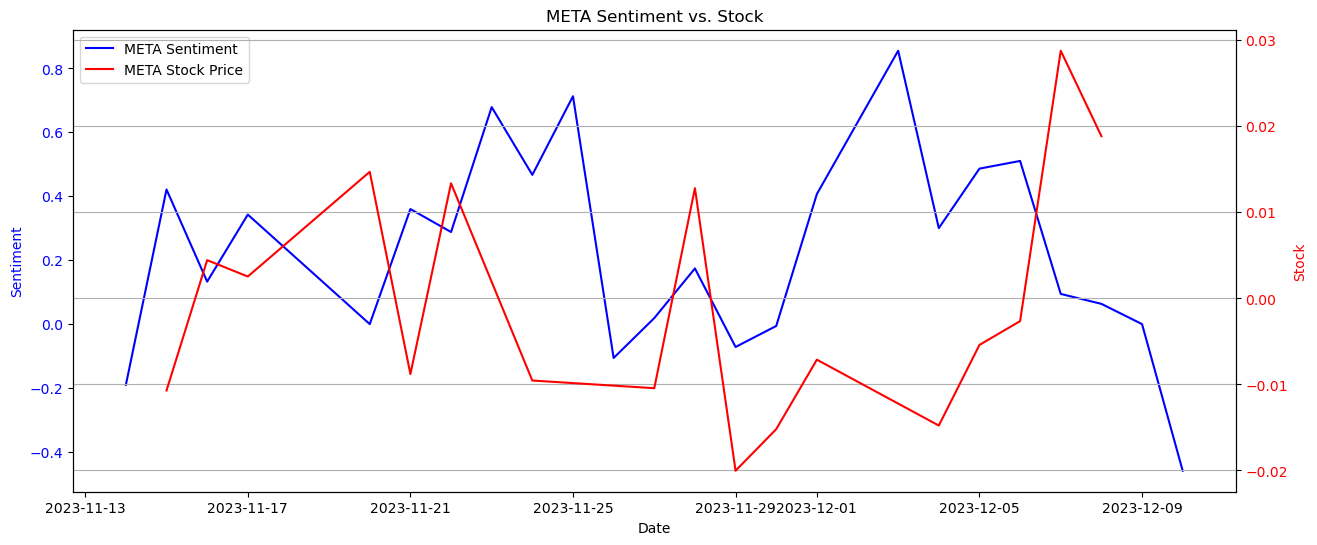

In [169]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax1.plot(meta_compound_avg_df.index, meta_compound_avg_df, label='META Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis (right) for the percentage change
ax2 = ax1.twinx()
ax2.plot(meta_stock.index, meta_stock, label='META Stock Price', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('META Sentiment vs. Stock')

# Show the plot
plt.grid(True)
plt.show()

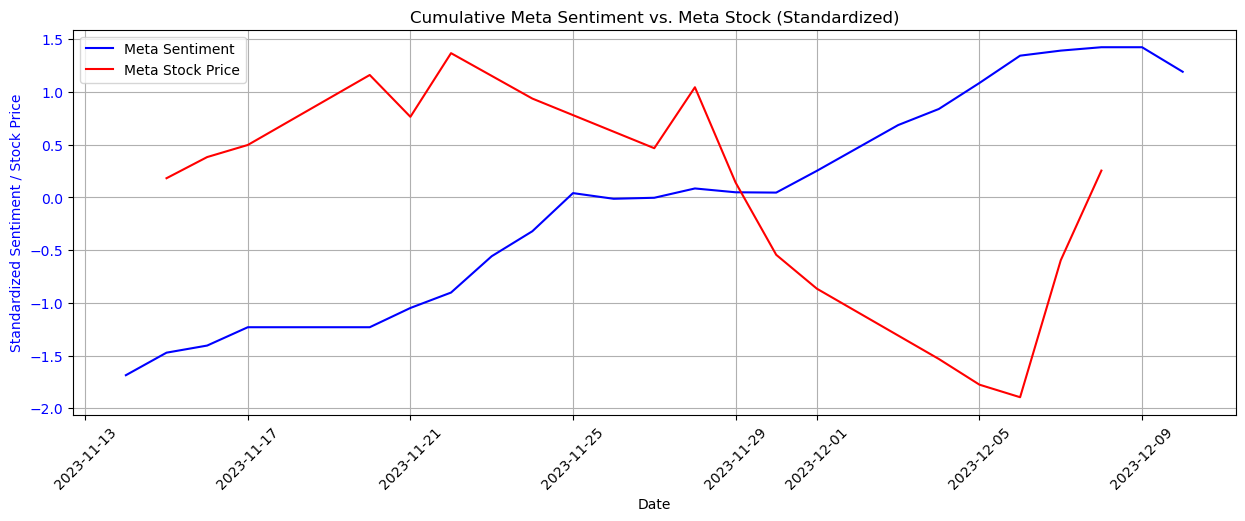

In [170]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Convert the index to a DatetimeIndex
meta_sent_cumsum.index = pd.to_datetime(meta_sent_cumsum.index)
meta_stock_cumsum.index = pd.to_datetime(meta_stock_cumsum.index)

# Standardize both sentiment and stock price cumulative data for Meta
meta_sent_cumsum_scaled = scaler.fit_transform(meta_sent_cumsum.values.reshape(-1, 1))
meta_stock_cumsum_scaled = scaler.fit_transform(meta_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(meta_sent_cumsum.index, meta_sent_cumsum_scaled, label='Meta Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(meta_stock_cumsum.index, meta_stock_cumsum_scaled, label='Meta Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Meta Sentiment vs. Meta Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()


_______

### 9. Apple Analysis

In [171]:
# Convert the date index to datetime objects for both dataframes
apple_compound_avg_df.index = pd.to_datetime(apple_compound_avg_df.index)
apple_closing.index = pd.to_datetime(apple_closing.index)

# Merge the two dataframes on their date indices
merged_df_apple= pd.merge(apple_compound_avg_df, apple_closing, left_index=True, right_index=True)

# Calculate the correlation coefficient
apple_k = merged_df_apple["compound"].corr(merged_df_apple["Apple"], method='kendall')
apple_s = merged_df_apple["compound"].corr(merged_df_apple["Apple"], method='spearman')
apple_cc = merged_df_apple["compound"].corr(merged_df_apple["Apple"], method='pearson')
# Display the correlation coefficient
print(f"Apple's Sentiment and Price Correlation through Kendall is {apple_k:.2f}")
print(f"Apple's Sentiment and Price Correlation through Spearman is {apple_s:.2f}")
print(f"Apple's Sentiment and Price Correlation through Pearson is {apple_cc:.2f}")
print(f"Apple Average Compound Score: {apple_compound_avg.iloc[0]:.2f}")

Apple's Sentiment and Price Correlation through Kendall is -0.15
Apple's Sentiment and Price Correlation through Spearman is -0.23
Apple's Sentiment and Price Correlation through Pearson is -0.09
Apple Average Compound Score: 0.26


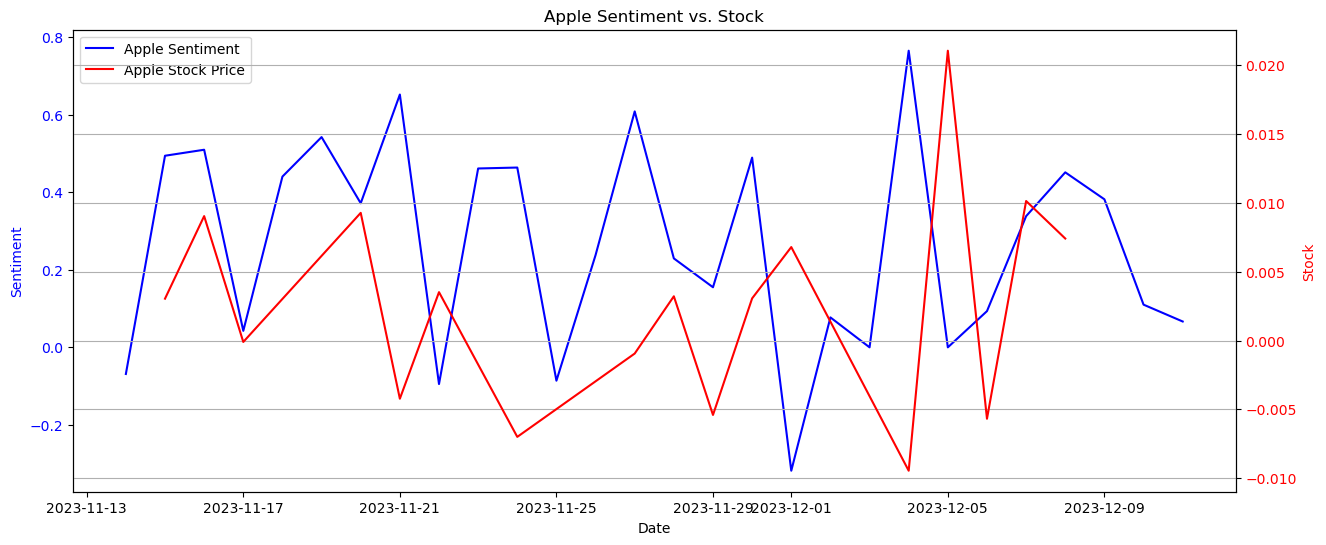

In [172]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax1.plot(apple_compound_avg_df.index, apple_compound_avg_df, label='Apple Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis (right) for the percentage change
ax2 = ax1.twinx()
ax2.plot(apple_stock.index, apple_stock, label='Apple Stock Price', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Apple Sentiment vs. Stock')

# Show the plot
plt.grid(True)
plt.show()

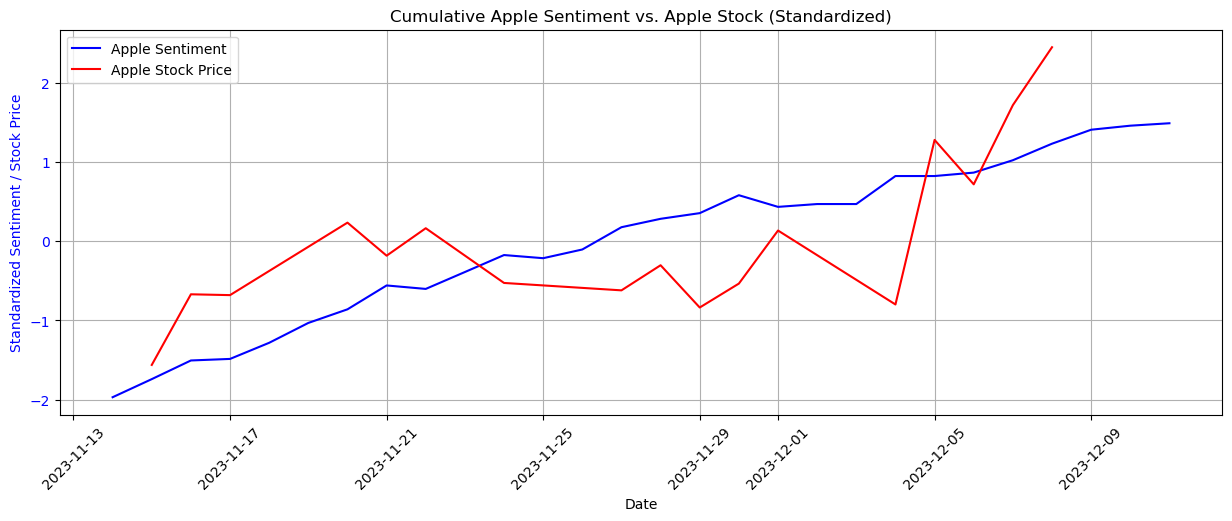

In [173]:
# Convert the dataframes to the right format
apple_sent_cumsum.index = pd.to_datetime(apple_sent_cumsum.index)
apple_stock_cumsum.index = pd.to_datetime(apple_stock_cumsum.index)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize both sentiment and stock price cumulative data for Apple
apple_sent_cumsum_scaled = scaler.fit_transform(apple_sent_cumsum.values.reshape(-1, 1))
apple_stock_cumsum_scaled = scaler.fit_transform(apple_stock_cumsum.values.reshape(-1, 1))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the standardized sentiment data as a blue line on the primary y-axis
ax.plot(apple_sent_cumsum.index, apple_sent_cumsum_scaled, label='Apple Sentiment', color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Standardized Sentiment / Stock Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Plot the standardized stock price data as a red line on the same y-axis
ax.plot(apple_stock_cumsum.index, apple_stock_cumsum_scaled, label='Apple Stock Price', color='red')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="upper left")

# Set the title of the chart
plt.title('Cumulative Apple Sentiment vs. Apple Stock (Standardized)')

# Show the plot
plt.grid(True)
plt.show()

# Recommendation algorithm

In [174]:
stock_compound_dict = {"Amazon" : amazon_compound_avg.iloc[0],
                       "Google" : google_compound_avg.iloc[0],
                       "Tesla" : tesla_compound_avg.iloc[0],
                       "Microsoft" : microsoft_compound_avg.iloc[0],
                       "Apple" : apple_compound_avg.iloc[0],
                       "META" : meta_compound_avg.iloc[0],
                       "Walmart" : walmart_compound_avg.iloc[0],
                       "Samsung" : samsung_compound_avg.iloc[0],
                       "Verizon" : verizon_compound_avg.iloc[0]}
stock_compound_values = list(stock_compound_dict.values())
# Iterate through the list and print each number with 4 decimal places
for value in stock_compound_values:
    formatted_compound_value = round(value, 4)  # Round to 4 decimal places
    print(formatted_compound_value)

0.2748
0.2179
-0.1143
0.2504
0.2648
0.2284
0.1832
0.3005
0.4268


In [175]:
stock_correlation_dict = {"Amazon" : amazon_k,
                          "Google" : google_k,
                          "Tesla" : tesla_k,
                          "Microsoft" : microsoft_k,
                          "Apple" : apple_k,
                          "META" : meta_k,
                          "Walmart" : walmart_k,
                          "Samsung" : samsung_k,
                          "Verizon" : verizon_k}
stock_correlation_dict

{'Amazon': 0.04761904761904762,
 'Google': 0.13333699146284095,
 'Tesla': 0.07189542483660132,
 'Microsoft': -0.30882352941176466,
 'Apple': -0.15032679738562094,
 'META': -0.02941176470588235,
 'Walmart': 0.2928895930645031,
 'Samsung': 0.13333699146284095,
 'Verizon': -0.14022235687718174}

In [176]:
# Define a function to calculate labels
def calculate_result(compound_value, correlation_value):
    if compound_value == 0 and correlation_value == 0:
        return "Neutral"
    if 0 < compound_value < 0.25: # positive news
        if 0 < correlation_value < 0.25: # small positive movement
            return "1"
        elif -0.25 < correlation_value < 0: # negative movement
            return "0"
        elif correlation_value > 0.25: # larger positive movement
            return "1"
        elif correlation_value < -0.25:
            return "0" # larger negative movement

    if 0.5 > compound_value > 0.25: # very positive news
        if correlation_value > 0.25: # larger positive movement
            return "1"
        elif 0 < correlation_value < 0.25: # small positive movement
            return "1"
        elif -0.25 < correlation_value < 0: # small negative movement
            return "0"
        elif correlation_value < -0.25:
            return "0" # larger negative movement

    if -0.25 < compound_value < -0.0001: # negative news
        if 0 < correlation_value < 0.25: # negative movemenet
            return "0"
        elif -0.25 < correlation_value < 0: # small positive movement
            return "1"
        elif -0.5 < correlation_value < -0.25:
            return "1" # large ngative movement

    if -0.5 < compound_value < -0.25:
        if correlation_value > 0.25:
            return "0"
        elif 0 < correlation_value < 0.25:
            return "0"
        elif -0.25 < correlation_value < 0:
            return "1"
        elif correlation_value > -0.25:
            return "1"
    if compound_value >0:
        if correlation_value > 0.25:
            return "1"

# Create an empty list to store the labels
results = []

# This will iterate through both of the lists and calculate labels
for i in range(len(stock_compound_values)):
    compound_value = stock_compound_values[i] # this will locate the sentiment value
    correlation_value = stock_correlation_values_k[i] # this will locate the correlation value
    result = calculate_result(stock_compound_values[i], stock_correlation_values_k[i])
    results.append(result) # this will add the label column

# Print the results
for stock, result in zip(stock_compound_dict.keys(), results):  
    print(f"{stock}: {result}")

Amazon: 1
Google: 1
Tesla: 0
Microsoft: 0
Apple: 0
META: 0
Walmart: 1
Samsung: 1
Verizon: 0


In [177]:
# Create a disctionary of the results
results_list = {"Amazon": results[0],
                "Google": results[1],
                "Tesla": results[2],
                "Microsoft": results[3],
                "Apple": results[4],
                "META": results[5],
                "Walmart": results[6],
                "Samsung": results[7],
                "Verizon": results[8]}
print(results_list)

{'Amazon': '1', 'Google': '1', 'Tesla': '0', 'Microsoft': '0', 'Apple': '0', 'META': '0', 'Walmart': '1', 'Samsung': '1', 'Verizon': '0'}


In [178]:
profit_margins = {"Google": profit_margin_google,
                  "Apple": profit_margin_apple,
                  "Tesla":profit_margin_tesla, 
                  "Walmart":profit_margin_walmart,
                  "Samsung":profit_margin_samsung, 
                  "META":profit_margin_meta,
                  "Amazaon": profit_margin_amazon,
                  "Verizon": profit_margin_verizon,
                  "Microsoft": profit_margin_microsoft
                  }

In [179]:
# Create a dictionary to store scores
scores = {}

# Assign scores based on profit margins
for company, margin in profit_margins.items():
    if margin > 0:
        scores[company] = 1
    else:
        scores[company] = -1

# Print the scores for each company
for company, score in scores.items():
    print(f"{company}: {score}")


Google: -1
Apple: 1
Tesla: 1
Walmart: -1
Samsung: 1
META: -1
Amazaon: 1
Verizon: 1
Microsoft: 1


In [180]:
# Define dictionaries with profit margins and recommendations
profit_margins = {
    'Amazon': 1,
    'Google': 1,
    'Tesla': 1,
    'Microsoft': 1,
    'Apple': 1,
    'META': 1,
    'Walmart': -1,
    'Samsung': 1,
    'Verizon': 1,
    
}

results_list = {'Amazon': '1', 'Google': '1', 'Tesla': '1', 'Microsoft': '0', 'Apple': '0', 'META': '0', 'Walmart': '1', 'Samsung': '1', 'Verizon': '0'}

# Initialise dictionaries to store the results
result_accuracy = {}
result_inaccuracy = {}

# Iterate through the dictionaries and check conditions
for stock, margin in profit_margins.items():
    recommendation = results_list.get(stock)

    if margin == 1 and recommendation == '1':
        result_accuracy[stock] = "result_accurate"
    elif margin == 1 and recommendation == '0':
        result_inaccuracy[stock] = "result_inaccurate"
    elif margin == -1 and recommendation == '1':
        result_inaccuracy[stock] = "result_inaccurate"
    elif margin == -1 and recommendation == '0':
        result_accuracy[stock] = "result_accurate"

# Print the results
print("Accurate Results:")
for stock, result in result_accuracy.items():
    print(f"{stock}: {result}")

print("\nInaccurate Results:")
for stock, result in result_inaccuracy.items():
    print(f"{stock}: {result}")


Accurate Results:
Amazon: result_accurate
Google: result_accurate
Tesla: result_accurate
Samsung: result_accurate

Inaccurate Results:
Microsoft: result_inaccurate
Apple: result_inaccurate
META: result_inaccurate
Walmart: result_inaccurate
Verizon: result_inaccurate


# Testing Area

In [181]:
# Google Stock DataFrame
google_stock_df = pd.DataFrame(google_closing)
google_stock_df = google_stock_df.rename(columns={"Google":"Close"})

# Tesla Stock DataFrame
tesla_stock_df = pd.DataFrame(tesla_closing)
tesla_stock_df=tesla_stock_df.rename(columns={"Tesla": "Close"})

# Apple Stock DataFrame
apple_stock_df = pd.DataFrame(apple_closing)
apple_stock_df = apple_stock_df.rename(columns={"Apple":"Close"})

# Walmart Stock DataFrame
walmart_stock_df = pd.DataFrame(walmart_closing)
walmart_stock_df = walmart_stock_df.rename(columns={"Walmart":"Close"})

# Microsoft
microsoft_stock_df = pd.DataFrame(microsoft_closing)
microsoft_stock_df = microsoft_stock_df.rename(columns={"Microsoft":"Close"})

# META
meta_stock_df = pd.DataFrame(meta_closing)
meta_stock_df = meta_stock_df.rename(columns={"META":"Close"})

# Samsung
samsung_stock_df = pd.DataFrame(samsung_closing)
samsung_stock_df = samsung_stock_df.rename(columns={"Samsung":"Close"})

# Verizon
verizon_stock_df = pd.DataFrame(verizon_closing)
verizon_stock_df = verizon_stock_df.rename(columns={"Verizon":"Close"})

# Amazon
amazon_stock_df = pd.DataFrame(amazon_closing)
amazon_stock_df = amazon_stock_df.rename(columns={"Amazon":"Close"})

In [182]:
# GOOGLE Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = google_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = google_stock_df.iloc[-1]['Close']  # Closing price on the end date
google_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_google = ((google_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Google Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${google_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_google:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_google = google_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_google['Portfolio Value'] = (
    initial_investment / portfolio_df_google.iloc[0]['Close'] * portfolio_df_google['Close']
)

portfolio_df_google.tail()

Initial Investment: $10000.00
Number of Google Shares Bought: 74.84
Portfolio Value at the End: $10102.53
Profit Margin at the End: %1.03


,Close,Portfolio Value
Date,,
2023-12-04,129.270004,9674.450606
2023-12-05,130.990005,9803.173947
2023-12-06,130.020004,9730.579930
2023-12-07,136.929993,10247.717234
2023-12-08,134.990005,10102.530342


In [183]:
# VERIZON Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = verizon_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = verizon_stock_df.iloc[-1]['Close']  # Closing price on the end date
verizon_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_verizon = ((verizon_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Verizon Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${verizon_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_verizon:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_verizon = verizon_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_verizon['Portfolio Value'] = (
    initial_investment / portfolio_df_verizon.iloc[0]['Close'] * portfolio_df_verizon['Close']
)

portfolio_df_verizon.tail()

Initial Investment: $10000.00
Number of Verizon Shares Bought: 278.71
Portfolio Value at the End: $10660.53
Profit Margin at the End: %6.61


,Close,Portfolio Value
Date,,
2023-12-04,38.040001,10602.006629
2023-12-05,38.419998,10707.914444
2023-12-06,38.500000,10730.211498
2023-12-07,38.650002,10772.017942
2023-12-08,38.250000,10660.534800


In [184]:
# SAMSUNG Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = samsung_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = samsung_stock_df.iloc[-1]['Close']  # Closing price on the end date
samsung_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_samsung = ((samsung_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Samsung Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${samsung_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_samsung:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_samsung = samsung_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_samsung['Portfolio Value'] = (
    initial_investment / portfolio_df_samsung.iloc[0]['Close'] * portfolio_df_samsung['Close']
)

portfolio_df_samsung.tail()

Initial Investment: $10000.00
Number of Samsung Shares Bought: 0.14
Portfolio Value at the End: $10254.24
Profit Margin at the End: %2.54


,Close,Portfolio Value
Date,,
2023-12-04,72600.0,10254.237288
2023-12-05,71200.0,10056.497175
2023-12-06,71700.0,10127.118644
2023-12-07,71500.0,10098.870056
2023-12-08,72600.0,10254.237288


In [185]:
# AMAZON Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = amazon_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = amazon_stock_df.iloc[-1]['Close']  # Closing price on the end date
amazon_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_amazon = ((amazon_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Amazon Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${amazon_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_amazon:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_amazon = amazon_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_amazon['Portfolio Value'] = (
    initial_investment / portfolio_df_amazon.iloc[0]['Close'] * portfolio_df_amazon['Close']
)

portfolio_df_amazon.tail()

Initial Investment: $10000.00
Number of Amazon Shares Bought: 68.59
Portfolio Value at the End: $10111.11
Profit Margin at the End: %1.11


,Close,Portfolio Value
Date,,
2023-12-04,144.839996,9934.155919
2023-12-05,146.880005,10074.074198
2023-12-06,144.520004,9912.208590
2023-12-07,146.880005,10074.074198
2023-12-08,147.419998,10111.110774


In [186]:
# TESLA Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = tesla_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = tesla_stock_df.iloc[-1]['Close']  # Closing price on the end date
tesla_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_tesla = ((tesla_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Tesla Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${tesla_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_tesla:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_tesla = tesla_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_tesla['Portfolio Value'] = (
    initial_investment / portfolio_df_tesla.iloc[0]['Close'] * portfolio_df_tesla['Close']
)

portfolio_df_tesla.tail()

Initial Investment: $10000.00
Number of Tesla Shares Bought: 42.12
Portfolio Value at the End: $10270.84
Profit Margin at the End: %2.71


,Close,Portfolio Value
Date,,
2023-12-04,235.580002,9922.918083
2023-12-05,238.720001,10055.178701
2023-12-06,239.369995,10082.557240
2023-12-07,242.639999,10220.293823
2023-12-08,243.839996,10270.839163


In [187]:
# META Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = meta_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = meta_stock_df.iloc[-1]['Close']  # Closing price on the end date
meta_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_meta = ((meta_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Google Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${meta_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_meta:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_meta = meta_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_meta['Portfolio Value'] = (
    initial_investment / portfolio_df_meta.iloc[0]['Close'] * portfolio_df_meta['Close']
)

portfolio_df_meta.tail()

Initial Investment: $10000.00
Number of Google Shares Bought: 29.73
Portfolio Value at the End: $9894.15
Profit Margin at the End: %-1.06


,Close,Portfolio Value
Date,,
2023-12-04,320.019989,9515.625207
2023-12-05,318.290009,9464.185152
2023-12-06,317.450012,9439.208305
2023-12-07,326.589996,9710.980902
2023-12-08,332.750000,9894.145354


In [188]:
# APPLE Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = apple_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = apple_stock_df.iloc[-1]['Close']  # Closing price on the end date
apple_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_apple = ((apple_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Tesla Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${apple_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_apple:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_apple = apple_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_apple['Portfolio Value'] = (
    initial_investment / portfolio_df_apple.iloc[0]['Close'] * portfolio_df_apple['Close']
)

portfolio_df_apple.tail()

Initial Investment: $10000.00
Number of Tesla Shares Bought: 53.35
Portfolio Value at the End: $10441.21
Profit Margin at the End: %4.41


,Close,Portfolio Value
Date,,
2023-12-04,189.429993,10106.166784
2023-12-05,193.419998,10319.035193
2023-12-06,192.320007,10260.350236
2023-12-07,194.270004,10364.383362
2023-12-08,195.710007,10441.208075


In [189]:
# Create the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = walmart_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = walmart_stock_df.iloc[-1]['Close']  # Closing price on the end date
walmart_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_walmart = ((walmart_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Walmart Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${walmart_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_walmart:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_walmart = walmart_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_walmart['Portfolio Value'] = (
    initial_investment / portfolio_df_walmart.iloc[0]['Close'] * portfolio_df_walmart['Close']
)

portfolio_df_walmart.tail()

Initial Investment: $10000.00
Number of Walmart Shares Bought: 59.87
Portfolio Value at the End: $9031.93
Profit Margin at the End: %-9.68


,Close,Portfolio Value
Date,,
2023-12-04,153.729050,9203.699207
2023-12-05,155.153748,9288.995322
2023-12-06,153.470001,9188.190075
2023-12-07,152.460007,9127.722092
2023-12-08,150.860001,9031.930340


In [190]:
# MICROSOFT Calculate the number of Google shares we can buy with $10,000 on the start date
initial_investment = 10000  # Initial investment amount
initial_price = microsoft_stock_df.iloc[0]['Close']  # Closing price on the start date
num_shares = initial_investment / initial_price

# Calculate the portfolio value at the end of the period
final_price = microsoft_stock_df.iloc[-1]['Close']  # Closing price on the end date
microsoft_portfolio_value = num_shares * final_price
# calculate profit margins
profit_margin_microsoft = ((microsoft_portfolio_value-initial_investment)/initial_investment)*100

print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Number of Google Shares Bought: {num_shares:.2f}")
print(f"Portfolio Value at the End: ${google_portfolio_value:.2f}")
print(f"Profit Margin at the End: %{profit_margin_microsoft:.2f}")

# Create a new DataFrame for the portfolio
portfolio_df_microsoft = microsoft_stock_df.copy()

# Calculate the portfolio value based on the closing prices
portfolio_df_microsoft['Portfolio Value'] = (
    initial_investment / portfolio_df_microsoft.iloc[0]['Close'] * portfolio_df_microsoft['Close']
)

portfolio_df_microsoft.tail()

Initial Investment: $10000.00
Number of Google Shares Bought: 27.06
Portfolio Value at the End: $10102.53
Profit Margin at the End: %1.27


,Close,Portfolio Value
Date,,
2023-12-04,369.140015,9989.717082
2023-12-05,372.519989,10081.186406
2023-12-06,368.799988,9980.515229
2023-12-07,370.950012,10038.699481
2023-12-08,374.230011,10127.463253
